In [1]:
import matplotlib.pyplot as plt
import numpy as np
import open3d
import os

from tqdm import tqdm

print(open3d.__version__)

0.17.0


In [57]:
mesh_path = os.path.expanduser('~/Downloads/warpauv_2_xavier3_RAW_2022-11-03-11-42-52-textured_model.fbx')
mesh = open3d.io.read_triangle_mesh(mesh_path, True)
# We can get information from the mesh like vertices, triangles, faces, UVs and texture
print(mesh)
print('Vertices:')

print(np.asarray(mesh.vertices))
print('Triangles:')
print(np.asarray(mesh.triangles))

# open3d.visualization.draw_geometries([mesh])


TriangleMesh with 39754873 points and 62903968 triangles, and textures of size (4096, 4096) (4096, 4096) (4096, 4096) (4096, 4096) (4096, 4096) (4096, 4096) (4096, 4096) (4096, 4096) (4096, 4096) (4096, 4096) 
Vertices:
[[  4.37871218 -18.22789383   0.86912823]
 [  4.3898735  -18.22953987   0.868168  ]
 [  4.38142872 -18.21796417   0.86392963]
 ...
 [  2.06773853  -4.40293312  -1.45711994]
 [  2.06770492  -4.40132618  -1.45601928]
 [  2.06700277  -4.40014648  -1.45763695]]
Triangles:
[[       0        1        2]
 [       1        3        2]
 [       0        2        4]
 ...
 [39754868 39754864 39754867]
 [39754849 39754869 39754864]
 [39754870 39754871 39754872]]


In [58]:
vtxs = np.asarray((mesh.vertices))
print(vtxs.shape)

x_range = (-9, 8)
y_range = (-21, -1)
step = 0.5

plot_xys = []
sas = []

rugosity_map = np.zeros((
    int((x_range[1] - x_range[0]) / step), 
    int((y_range[1] - y_range[0]) / step)
))

for idx_x, x in tqdm(enumerate(np.arange(x_range[0], x_range[1], step))):
    for idx_y, y in enumerate(np.arange(y_range[0], y_range[1], step)):
        select_idxs = np.where(np.logical_and(
            np.logical_and(
                vtxs[:, 0] > x, vtxs[:, 0] < (x + step)
            ), np.logical_and(
                vtxs[:, 1] > y, vtxs[:, 1] < (y + step)
            )
        ) == True)[0]
        small_mesh = mesh.select_by_index(select_idxs, cleanup=True)
        sa = small_mesh.get_surface_area()
        
        rugosity_map[idx_x, idx_y] = sa
        
        sas.append(sa)
        plot_xys.append((x, y))
            
            


(39754873, 3)


0it [00:00, ?it/s]

[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are

1it [00:11, 11.94s/it]

[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are

2it [00:22, 10.86s/it]

[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are

3it [00:33, 10.98s/it]

[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are

4it [00:43, 10.70s/it]

[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are

5it [00:54, 10.88s/it]

[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are

6it [01:05, 10.84s/it]

[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are

7it [01:16, 11.06s/it]

[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are

8it [01:27, 10.85s/it]

[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are

9it [01:38, 10.85s/it]

[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are

10it [01:49, 10.98s/it]

[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are

11it [01:59, 10.70s/it]

[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are

12it [02:09, 10.64s/it]

[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are

13it [02:21, 10.87s/it]

[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are

14it [02:31, 10.75s/it]

[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are

15it [02:42, 10.66s/it]

[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are

16it [02:52, 10.61s/it]

[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are

17it [03:03, 10.68s/it]

[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are

18it [03:15, 11.11s/it]

[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are

19it [03:26, 11.12s/it]

[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are

20it [03:38, 11.15s/it]

[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are

21it [03:49, 11.07s/it]

[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are

22it [03:59, 11.05s/it]

[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are

23it [04:10, 10.96s/it]

[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are

24it [04:22, 11.18s/it]

[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are

25it [04:34, 11.39s/it]

[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are

26it [04:45, 11.44s/it]

[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are

27it [04:58, 11.69s/it]

[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are

28it [05:10, 11.78s/it]

[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are

29it [05:22, 11.93s/it]

[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are

30it [05:32, 11.46s/it]

[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are

31it [05:43, 11.12s/it]

[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are

32it [05:53, 10.85s/it]

[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are

33it [06:04, 10.80s/it]

[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function
[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are

34it [06:14, 11.01s/it]

[Open3D WARNING] [SelectByIndex] This mesh contains triangle uvs that are not handled in this function


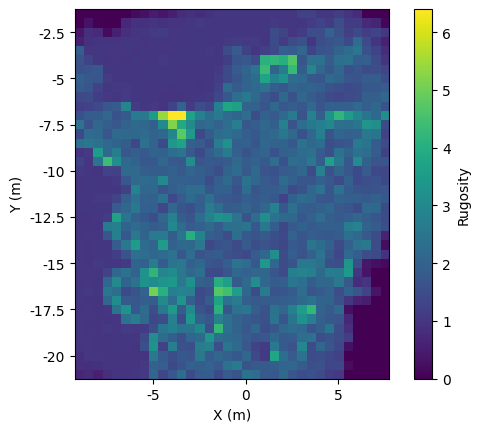

In [64]:
plt_map = rugosity_map / (step * step)
plt.imshow(plt_map.T, origin='lower')
ax = plt.gca()

def val_to_plot(val, axis_range, step):
    percent = (val - axis_range[0]) / (axis_range[1] - axis_range[0])
    plotted_max = (axis_range[1] - axis_range[0]) / step
    return plotted_max * percent
    
x_ticks = [-5, 0, 5]
y_ticks = [-20, -17.5, -15, -12.5, -10, -7.5, -5, -2.5]
ax.set_xticks([val_to_plot(val, x_range, step) for val in x_ticks])
ax.set_xticklabels(x_ticks)
ax.set_yticks([val_to_plot(val, y_range, step) for val in y_ticks])
ax.set_yticklabels(y_ticks)
ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")


cbar = plt.colorbar()
# cbar.set_label('Rugosity for 0.25 m$^2$ patches')
cbar.set_label('Rugosity')
